In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:

df = pd.read_csv('titanic_prepared_data.csv')
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Embarked_3,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,0,1,1


In [72]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
print X.shape, y.shape

(891L, 11L) (891L, 1L)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print X_train.shape, y_train.shape

(712L, 11L) (712L, 1L)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

81.01 %


In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.ravel())
y_pred_knn = clf.predict(X_test)
acc_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print (str(acc_knn) + ' percent')

69.83 percent


In [76]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train.ravel())
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

71.51 percent


In [77]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.ravel())
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

77.65 percent


In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train.ravel())
y_RandomForestClassifier = clf.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_RandomForestClassifier, y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

77.65 percent


In [79]:
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
acc_RandomForestClassifier = round(accuracy_score(y_RandomForestClassifier, y_test) * 100, 2)
if(acc_log_reg > acc_RandomForestClassifier) :
  print ('Logistic Regression has higher accuracy of ' + str(acc_log_reg))
elif (acc_log_reg < acc_RandomForestClassifier):
  print ('RandomForestClassifier has higher accuracy of ' + str(acc_RandomForestClassifier))
else:
  print ('Both Logistic Regression and Random Forest Classifier has equal accuracy')

RandomForestClassifier has higher accuracy of 83.8


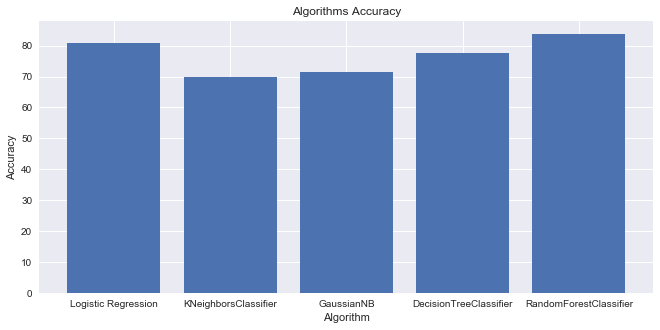

In [80]:
x = ['Logistic Regression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier']
y = [acc_log_reg,acc_knn,acc_gnb,acc_decision_tree,acc_RandomForestClassifier]
y_pos = np.arange(len(x))
plt.figure(figsize=(11,5))
plt.bar(y_pos,y,align='center')
plt.xticks(y_pos,x)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithms Accuracy')
 
plt.show()